In [1]:
include("../path.jl")
include("../ToolBox/ToolBox.jl")
import FileIO
using .ToolBox
using .Geometry
using Colors

In [2]:
master_meta_path = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vh-20170315t053950-20170315t054018-004715-0083b0-003.xml"
master_data_path  = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vh-20170315t053950-20170315t054018-004715-0083b0-003.tiff"
slave_meta_path = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/annotation/s1b-iw3-slc-vh-20170327t053950-20170327t054018-004890-0088ae-003.xml"
slave_data_path = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/measurement/s1b-iw3-slc-vh-20170327t053950-20170327t054018-004890-0088ae-003.tiff"

"/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/measurement/s1b-iw3-slc-vh-20170327t053950-20170327t054018-004890-0088ae-003.tiff"

In [3]:
master_view = [2000:6000,1000:9000]
small = 5001:8001

5001:8001

In [4]:
# load meta and pod
master_meta = Load.slc_meta(master_meta_path);
master_precise_orbit = Load.precise_orbit(master_pod_path,master_meta["t_0"]);
slave_meta = Load.slc_meta(slave_meta_path);
slave_precise_orbit = Load.precise_orbit(slave_pod_path,slave_meta["t_0"]);

meta = (master_meta,slave_meta)
precise_orbit = (master_precise_orbit,slave_precise_orbit);

In [5]:
# load DEM
footprint = SlcUtil.footprint(master_meta, master_view)
latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);

In [6]:
slave_data,flat,lut =  coregister_slave(master_view,slave_data_path,meta,precise_orbit,dem)
slave_data,mosaic_view = SlcUtil.mosaic(slave_data,master_view,meta[1]);
flat,mosaic_view = SlcUtil.mosaic(flat,master_view,meta[1]);

master_data = Load.slc_data(master_data_path,master_view);
master_data,mosaic_view = SlcUtil.mosaic(master_data,master_view,meta[1]);

In [7]:
kernel = ones(4,14)
complex_coherence, master_intensity, slave_intensity, lines, samples = SlcUtil.complex_coherence(master_data, slave_data, flat, kernel, mosaic_view);

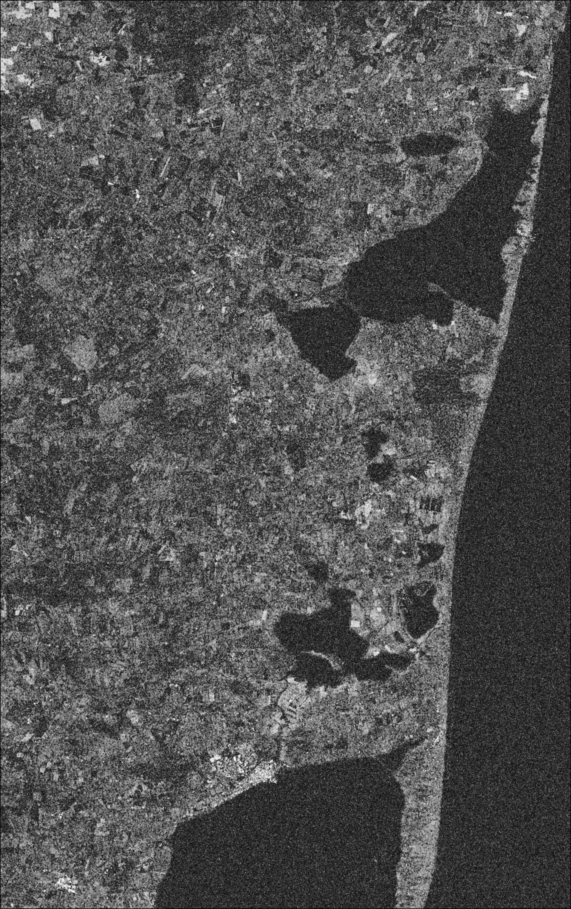

In [8]:
coherence_img = Gray.(abs.(complex_coherence[1:2:end,1:7:end]))

In [9]:
#FileIO.save("Coherence_multiloock_coherence_VH.jpg",coherence_img)

In [10]:
#phase_img = SlcUtil.plot_phase(complex_coherence[1:2:end,1:7:end])

In [11]:
#FileIO.save("Coherence_multiloock_phase_VH.jpg",phase_img)

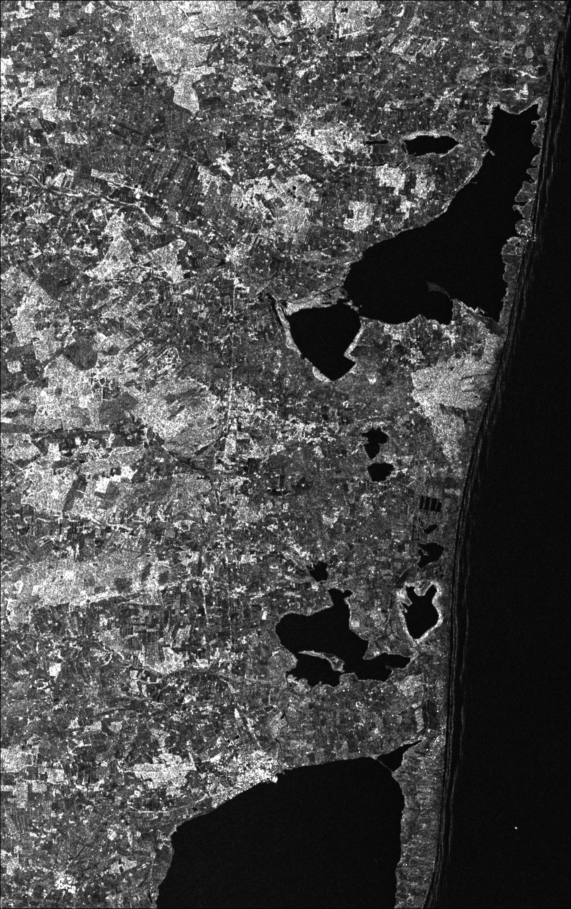

In [12]:
intensity = SlcUtil.show_img(master_intensity[1:2:end,1:7:end])

In [13]:
#FileIO.save("Multiloock_master_intensity_VH.jpg",intensity[1:2:end,1:7:end])

In [14]:
import JLD
JLD.save("inten_VH.jld", "data", master_intensity[1:2:end,1:7:end].-minimum(minimum(master_intensity[1:2:end,1:7:end])))
JLD.save("Coherence_VH.jld", "data", abs.(complex_coherence[1:2:end,1:7:end]))